In [ ]:
import yfinance as yf
from datetime import datetime
import pandas as pd

# Define el símbolo del ticker y el periodo de tiempo
ticker = '^IBEX'
start_date = '2012-01-01'
end_date = datetime.now().strftime('%Y-%m-%d')

# Descarga los datos
data = yf.download(ticker, start=start_date, end=end_date)

# Cálculo de columnas adicionales
data['Daily_Return'] = data['Close'].pct_change()  # Rendimiento diario
data['50_MA'] = data['Close'].rolling(window=50).mean()  # Media móvil de 50 días
data['200_MA'] = data['Close'].rolling(window=200).mean()  # Media móvil de 200 días

# Cálculo del RSI (Relative Strength Index)
delta = data['Close'].diff(1)
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))

# MACD (Moving Average Convergence Divergence)
data['12_EMA'] = data['Close'].ewm(span=12, adjust=False).mean()  # Media exponencial de 12 días
data['26_EMA'] = data['Close'].ewm(span=26, adjust=False).mean()  # Media exponencial de 26 días
data['MACD'] = data['12_EMA'] - data['26_EMA']  # Línea MACD
data['Signal_Line'] = data['MACD'].ewm(span=9, adjust=False).mean()  # Línea de señal

# Seleccionar columnas relevantes
dataset = data[['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close',
                'Daily_Return', '50_MA', '200_MA', 'RSI', 'MACD', 'Signal_Line']]
dataset.reset_index(inplace=True)
dataset.dropna(inplace=True)  # Eliminar filas con valores NaN generados por los cálculos de media móvil y RSI

# Guardar el dataset en un archivo CSV
dataset.to_csv('ibex_dataset_completo.csv', index=False)
print(dataset.head())


[*********************100%***********************]  1 of 1 completed
<ipython-input-1-f827391e9be5>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.dropna(inplace=True)  # Eliminar filas con valores NaN generados por los cálculos de media móvil y RSI


Price                       Date         Open         High          Low  \
Ticker                                  ^IBEX        ^IBEX        ^IBEX   
199    2012-10-11 00:00:00+00:00  7615.399902  7777.700195  7565.500000   
200    2012-10-12 00:00:00+00:00  7724.000000  7791.500000  7652.399902   
201    2012-10-15 00:00:00+00:00  7653.899902  7723.399902  7624.700195   
202    2012-10-16 00:00:00+00:00  7747.000000  7941.799805  7741.600098   
203    2012-10-17 00:00:00+00:00  8005.799805  8131.899902  7987.000000   

Price         Close     Volume    Adj Close Daily_Return        50_MA  \
Ticker        ^IBEX      ^IBEX        ^IBEX                             
199     7734.700195  148864200  7734.692383     0.008699  7616.490010   
200     7652.399902  112345200  7652.392090    -0.010640  7634.424004   
201     7678.500000  111705600  7678.492188     0.003411  7646.922002   
202     7940.200195  218384000  7940.192383     0.034082  7661.504004   
203     8128.200195  279964400  8128

**Open**: Precio de apertura del índice al inicio de cada sesión de trading. Es el primer precio al que se negoció el índice en el día.

**High**: Precio máximo alcanzado por el índice durante la sesión de trading. Ayuda a identificar el punto más alto de la actividad del índice en el día.

**Low**: Precio mínimo alcanzado por el índice durante la sesión de trading. Permite ver el punto más bajo de la actividad del índice en el día.

**Close**: Precio de cierre del índice al final de la sesión de trading. Este es el precio más utilizado en el análisis técnico y es clave para calcular indicadores y comparar cambios en el tiempo.

**Volume**: Volumen de negociación diario, que representa la cantidad total de acciones negociadas. Un volumen alto puede indicar alta liquidez o interés en el índice.

**Adj Close**: Precio de cierre ajustado, que considera ajustes como dividendos y divisiones de acciones. Es especialmente útil para hacer comparaciones de largo plazo, ya que refleja el rendimiento real.

**Daily_Return**: Rendimiento diario del índice, calculado como el cambio porcentual entre el precio de cierre de hoy y el de ayer. Este indicador muestra la ganancia o pérdida diaria en relación al precio de cierre anterior.

**50_MA**: Media móvil de 50 días, calculada como el promedio de los precios de cierre de los últimos 50 días. Es un indicador comúnmente usado para identificar tendencias a corto plazo. Una tendencia alcista suele observarse cuando el precio está por encima de esta media móvil.

**200_MA**: Media móvil de 200 días, que toma el promedio de los precios de cierre de los últimos 200 días. Se usa para identificar tendencias a largo plazo. Cuando el índice está por encima de la 200_MA, suele indicar una tendencia alcista a largo plazo.

**RSI (Relative Strength Index)**: Índice de Fuerza Relativa, un indicador que oscila entre 0 y 100. Se utiliza para medir la velocidad y el cambio de los movimientos de precios. Un valor por encima de 70 indica que el índice podría estar sobrecomprado, mientras que un valor por debajo de 30 puede indicar que está sobrevendido.

**MACD (Moving Average Convergence Divergence)**: Un indicador que mide la diferencia entre dos medias móviles exponenciales (EMA), típicamente de 12 y 26 días. Si el MACD es positivo, muestra una presión de compra; si es negativo, una presión de venta.

**Signal_Line**: Línea de señal del MACD, que es la media móvil exponencial de 9 días del MACD. Se usa junto con el MACD para detectar cambios de tendencia. Cuando el MACD cruza por encima de la línea de señal, suele ser una señal de compra, y cuando cruza por debajo, suele ser una señal de venta.

In [ ]:
# Seleccionamos las columnas relevantes
data = data[['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']]


In [ ]:
pip install scikit-learn


In [ ]:
from sklearn.preprocessing import MinMaxScaler


In [ ]:
# Escalador para normalizar los datos
scaler = MinMaxScaler(feature_range=(0, 1))

# Aplicamos el escalador a todas las columnas relevantes
data_scaled = scaler.fit_transform(data[['Close', 'Volume']])
data[['Close_Scaled', 'Volume_Scaled']] = data_scaled


In [ ]:
# Media Móvil
data['50_MA'] = data['Close'].rolling(window=50).mean()
data['200_MA'] = data['Close'].rolling(window=200).mean()

# RSI
delta = data['Close'].diff(1)
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))

# MACD
data['12_EMA'] = data['Close'].ewm(span=12, adjust=False).mean()
data['26_EMA'] = data['Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = data['12_EMA'] - data['26_EMA']
data['Signal_Line'] = data['MACD'].ewm(span=9, adjust=False).mean()


In [ ]:
import numpy as np

In [ ]:
# Tamaño de la ventana (ej., 30 días)
window_size = 30

# Crear secuencias de entrenamiento
def create_sequences(data, window_size):
    sequences = []
    labels = []
    for i in range(len(data) - window_size):
        sequences.append(data[i:i + window_size, :])
        labels.append(data[i + window_size, 0])  # El primer valor suele ser el precio de cierre escalado
    return np.array(sequences), np.array(labels)

# Transformamos solo los datos escalados para el modelo LSTM
sequences, labels = create_sequences(data_scaled, window_size)


In [ ]:
# División en entrenamiento (80%) y prueba (20%)
train_size = int(len(sequences) * 0.8)
X_train, X_test = sequences[:train_size], sequences[train_size:]
y_train, y_test = labels[:train_size], labels[train_size:]


MODELO LSTM

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


MODELO 1

In [ ]:
# Definir el modelo secuencial
model = Sequential()

# Primera capa LSTM con Dropout para evitar el sobreajuste
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

# Segunda capa LSTM con Dropout
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

# Tercera capa LSTM con Dropout
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Capa Densa final
model.add(Dense(units=1))  # Una salida para predecir el próximo valor de cierre


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 18s 67ms/step - loss: 0.0836 - val_loss: 0.0033
Epoch 2/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0059 - val_loss: 0.0018
Epoch 3/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.0054 - val_loss: 0.0026
Epoch 4/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 7s 66ms/step - loss: 0.0049 - val_loss: 0.0017
Epoch 5/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 8s 44ms/step - loss: 0.0048 - val_loss: 0.0013
Epoch 6/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 7s 67ms/step - loss: 0.0042 - val_loss: 0.0019
Epoch 7/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.0043 - val_loss: 0.0012
Epoch 8/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - loss: 0.0043 - val_loss: 0.0013
Epoch 9/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0036 - val_loss: 0.0011
Epoch 10/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0040 - val_loss: 0.0011
Epoch 11/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - loss: 0.0036 - val_loss: 0.0012
Epoch 12/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - loss: 0.

In [ ]:
# Evaluar el modelo en los datos de prueba
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss (MSE): {test_loss}")


21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4.2903e-04
Test Loss (MSE): 0.0005728666437789798


In [ ]:
# Hacer predicciones
predictions = model.predict(X_test)

# Revertir la escala para comparar con los valores originales
predictions = scaler.inverse_transform(np.concatenate([predictions, np.zeros((predictions.shape[0], data_scaled.shape[1]-1))], axis=1))[:, 0]
y_test_original = scaler.inverse_transform(np.concatenate([y_test.reshape(-1, 1), np.zeros((y_test.shape[0], data_scaled.shape[1]-1))], axis=1))[:, 0]


21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step


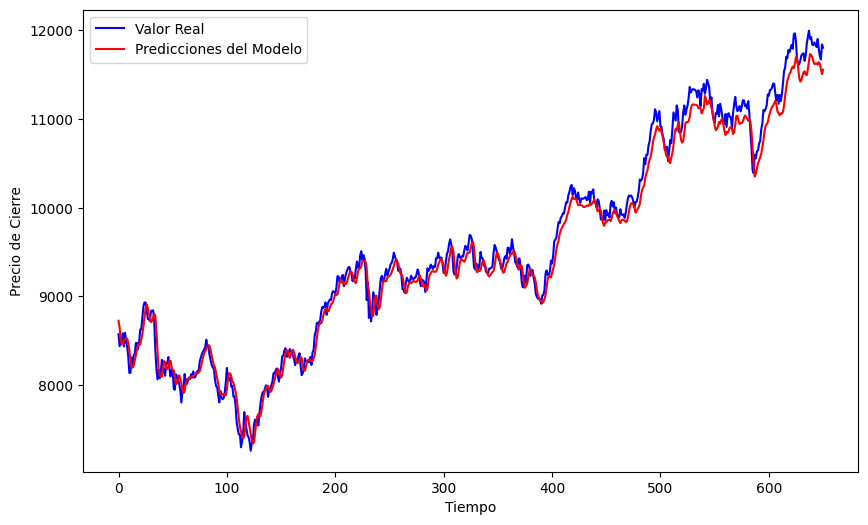

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test_original, color='blue', label='Valor Real')
plt.plot(predictions, color='red', label='Predicciones del Modelo')
plt.xlabel('Tiempo')
plt.ylabel('Precio de Cierre')
plt.legend()
plt.show()


MODELO 2

In [ ]:
# Importar librerías necesarias
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

# Definir el modelo secuencial mejorado
improved_model = Sequential()

# Primera capa LSTM con Dropout
improved_model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
improved_model.add(Dropout(0.3))

# Segunda capa LSTM con Dropout
improved_model.add(LSTM(units=100, return_sequences=True))
improved_model.add(Dropout(0.3))

# Tercera capa LSTM con Dropout
improved_model.add(LSTM(units=100, return_sequences=True))
improved_model.add(Dropout(0.3))

# Cuarta capa LSTM sin return_sequences
improved_model.add(LSTM(units=100, return_sequences=False))
improved_model.add(Dropout(0.3))

# Capa Densa final
improved_model.add(Dense(units=1))  # Una salida para predecir el próximo valor de cierre

# Compilar el modelo con un learning rate más bajo
improved_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Definir Early Stopping y Model Checkpoint
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_improved_model.keras', monitor='val_loss', save_best_only=True)

# Entrenar el modelo mejorado
history = improved_model.fit(X_train, y_train, epochs=60, batch_size=32, validation_data=(X_test, y_test),
                             callbacks=[early_stop, checkpoint], verbose=1)


Epoch 1/60
82/82 ━━━━━━━━━━━━━━━━━━━━ 20s 123ms/step - loss: 0.0494 - val_loss: 0.0036
Epoch 2/60
82/82 ━━━━━━━━━━━━━━━━━━━━ 9s 102ms/step - loss: 0.0074 - val_loss: 0.0020
Epoch 3/60
82/82 ━━━━━━━━━━━━━━━━━━━━ 12s 125ms/step - loss: 0.0054 - val_loss: 0.0018
Epoch 4/60
82/82 ━━━━━━━━━━━━━━━━━━━━ 21s 128ms/step - loss: 0.0061 - val_loss: 0.0020
Epoch 5/60
82/82 ━━━━━━━━━━━━━━━━━━━━ 20s 116ms/step - loss: 0.0048 - val_loss: 0.0014
Epoch 6/60
82/82 ━━━━━━━━━━━━━━━━━━━━ 10s 122ms/step - loss: 0.0049 - val_loss: 0.0050
Epoch 7/60
82/82 ━━━━━━━━━━━━━━━━━━━━ 10s 115ms/step - loss: 0.0044 - val_loss: 0.0037
Epoch 8/60
82/82 ━━━━━━━━━━━━━━━━━━━━ 9s 99ms/step - loss: 0.0039 - val_loss: 0.0015
Epoch 9/60
82/82 ━━━━━━━━━━━━━━━━━━━━ 12s 117ms/step - loss: 0.0035 - val_loss: 0.0013
Epoch 10/60
82/82 ━━━━━━━━━━━━━━━━━━━━ 10s 123ms/step - loss: 0.0037 - val_loss: 0.0053
Epoch 11/60
82/82 ━━━━━━━━━━━━━━━━━━━━ 9s 107ms/step - loss: 0.0031 - val_loss: 0.0011
Epoch 12/60
82/82 ━━━━━━━━━━━━━━━━━━━━ 10s 10

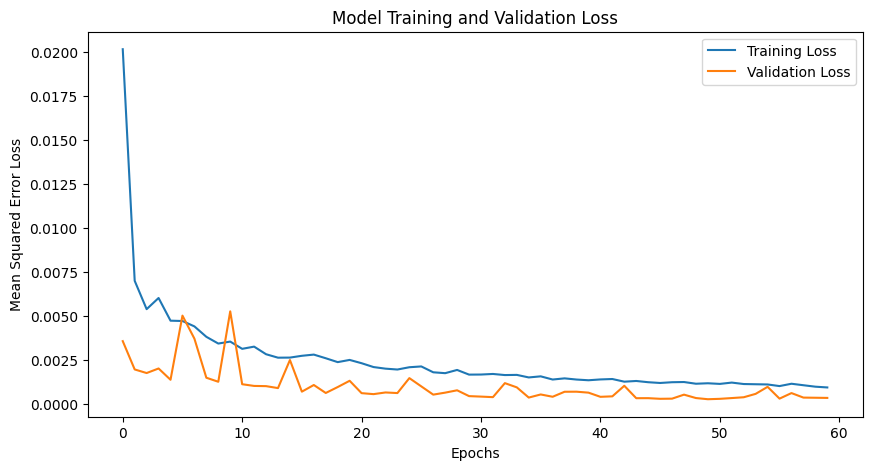

In [ ]:
import matplotlib.pyplot as plt

# Suponiendo que `history` es el resultado de `model.fit`
# Extrae las pérdidas de entrenamiento y validación
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Graficar el historial de entrenamiento
plt.figure(figsize=(10, 5))
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Model Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error Loss')
plt.legend()
plt.show()


In [ ]:
# Hacer predicciones
predictions = improved_model.predict(X_test)

# Revertir la escala para comparar con los valores originales
predictions = scaler.inverse_transform(np.concatenate([predictions, np.zeros((predictions.shape[0], data_scaled.shape[1]-1))], axis=1))[:, 0]
y_test_original = scaler.inverse_transform(np.concatenate([y_test.reshape(-1, 1), np.zeros((y_test.shape[0], data_scaled.shape[1]-1))], axis=1))[:, 0]

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


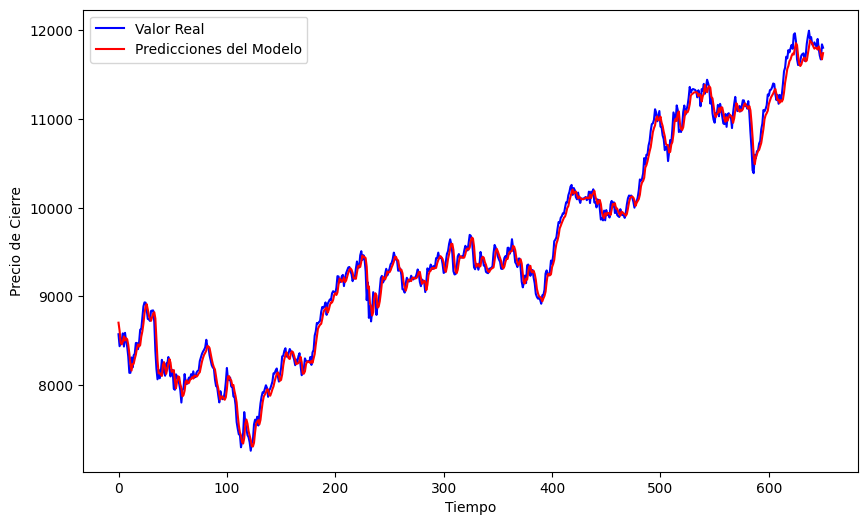

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test_original, color='blue', label='Valor Real')
plt.plot(predictions, color='red', label='Predicciones del Modelo')
plt.xlabel('Tiempo')
plt.ylabel('Precio de Cierre')
plt.legend()
plt.show()